<a href="https://colab.research.google.com/github/JumanaKhrais/Operating-Systems-Project/blob/main/Primary_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 



In [3]:
data = pd.read_csv('/content/drive/MyDrive/Operating-Systems-Project-Code/Dataset-OS.csv')

In [4]:
data.shape

(3577296, 87)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [6]:
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


**Classes Distribution**

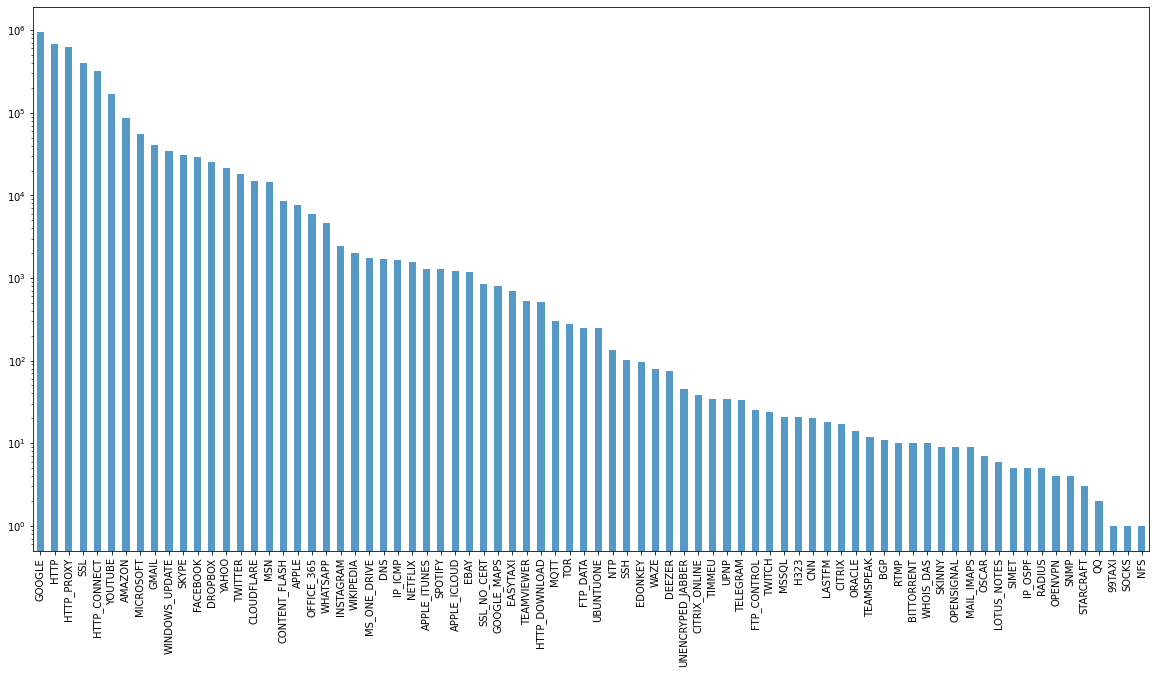

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
data['ProtocolName'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True)


In [8]:
l=data['ProtocolName'].value_counts().to_dict()

In [9]:
print(l)

{'GOOGLE': 959110, 'HTTP': 683734, 'HTTP_PROXY': 623210, 'SSL': 404883, 'HTTP_CONNECT': 317526, 'YOUTUBE': 170781, 'AMAZON': 86875, 'MICROSOFT': 54710, 'GMAIL': 40260, 'WINDOWS_UPDATE': 34471, 'SKYPE': 30657, 'FACEBOOK': 29033, 'DROPBOX': 25102, 'YAHOO': 21268, 'TWITTER': 18259, 'CLOUDFLARE': 14737, 'MSN': 14478, 'CONTENT_FLASH': 8589, 'APPLE': 7615, 'OFFICE_365': 5941, 'WHATSAPP': 4593, 'INSTAGRAM': 2415, 'WIKIPEDIA': 2025, 'MS_ONE_DRIVE': 1748, 'DNS': 1695, 'IP_ICMP': 1631, 'NETFLIX': 1560, 'APPLE_ITUNES': 1287, 'SPOTIFY': 1269, 'APPLE_ICLOUD': 1200, 'EBAY': 1192, 'SSL_NO_CERT': 856, 'GOOGLE_MAPS': 807, 'EASYTAXI': 705, 'TEAMVIEWER': 527, 'HTTP_DOWNLOAD': 516, 'MQTT': 302, 'TOR': 276, 'FTP_DATA': 251, 'UBUNTUONE': 249, 'NTP': 135, 'SSH': 102, 'EDONKEY': 95, 'WAZE': 79, 'DEEZER': 74, 'UNENCRYPED_JABBER': 45, 'CITRIX_ONLINE': 38, 'TIMMEU': 34, 'UPNP': 34, 'TELEGRAM': 33, 'FTP_CONTROL': 25, 'TWITCH': 24, 'MSSQL': 21, 'H323': 21, 'CNN': 20, 'LASTFM': 18, 'CITRIX': 17, 'ORACLE': 14, 'TEAM

**Checking Null Values**

Flow.ID             0.0
Source.IP           0.0
Source.Port         0.0
Destination.IP      0.0
Destination.Port    0.0
                   ... 
Idle.Max            0.0
Idle.Min            0.0
Label               0.0
L7Protocol          0.0
ProtocolName        0.0
Length: 87, dtype: float64


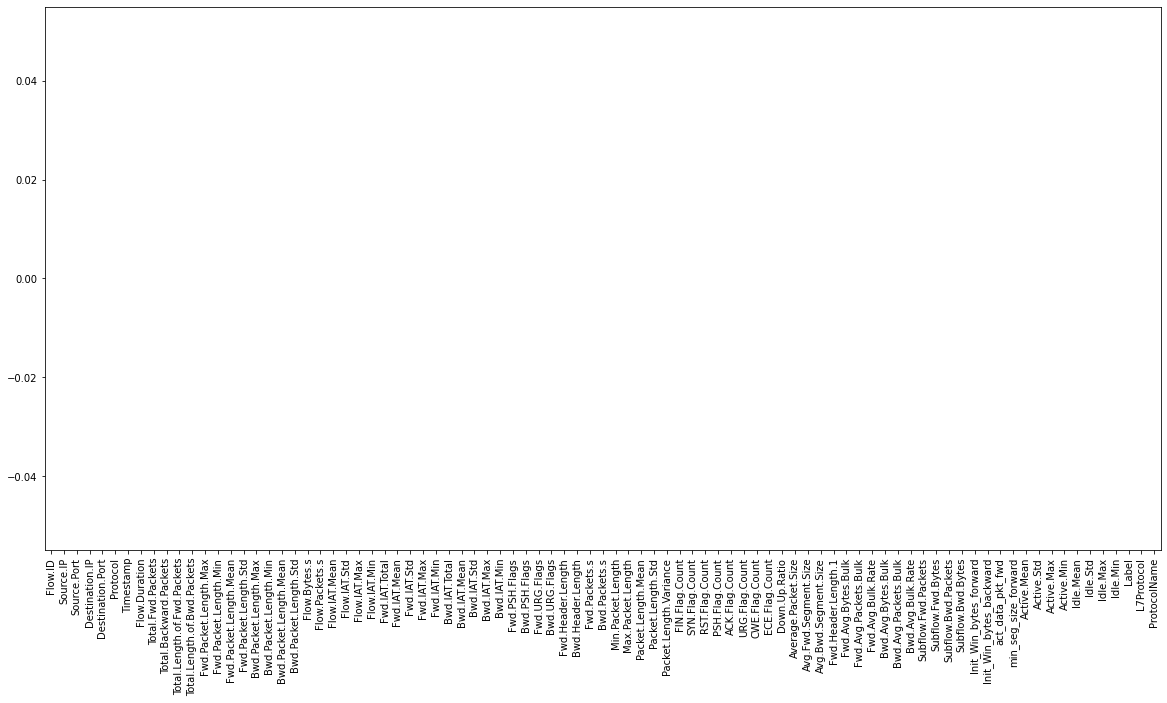

In [10]:
data.isna().sum() 

percent_missing = data.isna().sum() * 100 / len(data)

print (percent_missing)

data.isna().sum().plot(kind='bar')

**Features Category(2):Temporal information per flow**

In [11]:
data[['ProtocolName', 'Flow.Duration']].groupby('ProtocolName').mean()

,Flow.Duration
ProtocolName,
99TAXI,1.171180e+05
AMAZON,2.071954e+07
APPLE,8.244832e+06
APPLE_ICLOUD,1.111335e+07
APPLE_ITUNES,7.172111e+06
...,...
WHOIS_DAS,8.503358e+06
WIKIPEDIA,2.019769e+07
WINDOWS_UPDATE,1.732520e+07


In [12]:
df= data[['ProtocolName', 'Flow.Duration']].groupby('ProtocolName').mean()

In [13]:
a = df['Flow.Duration'].value_counts().to_dict()
b = { key: value for key, value in a.items() if value > 1 }
print(b)


{}


**Features Category(3): Information related to the packets per flow**



In [14]:
df1 = data[['Total.Fwd.Packets','Total.Backward.Packets','Total.Length.of.Fwd.Packets','Total.Length.of.Bwd.Packets','Fwd.Packet.Length.Max','Fwd.Packet.Length.Min','Fwd.Packet.Length.Mean',
'Fwd.Packet.Length.Std','Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean' , 'Bwd.Packet.Length.Std'
]]

In [15]:
df2= data[['Fwd.Packet.Length.Max','Fwd.Packet.Length.Min','Fwd.Packet.Length.Mean',
'Fwd.Packet.Length.Std','Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean' , 'Bwd.Packet.Length.Std']]

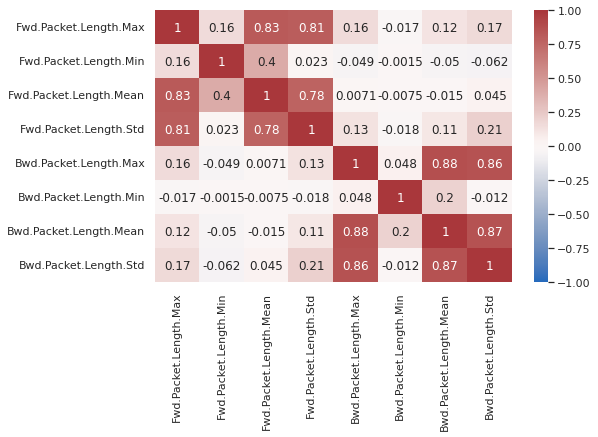

<Figure size 288x288 with 0 Axes>

In [18]:
df = df2
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(4,4)})
plt.show()
plt.savefig('heatmapcateg3-1.png')


In [19]:
df3 = data[['Total.Fwd.Packets','Total.Backward.Packets','Total.Length.of.Fwd.Packets','Total.Length.of.Bwd.Packets']]

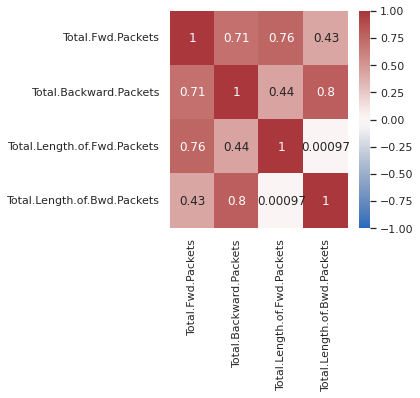

<Figure size 288x288 with 0 Axes>

In [20]:
df = df3
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(4,4)})
plt.show()
plt.savefig('heatmapcateg3-2.png')


Variance()

In [21]:
for (columnName, columnData) in df1.iteritems():
   print('Colunm Name : ', columnName)
   print(columnData.var())
   print("++++++++++++++++++++")

Colunm Name :  Total.Fwd.Packets
1197024.5013338057
++++++++++++++++++++
Colunm Name :  Total.Backward.Packets
1227868.8111197832
++++++++++++++++++++
Colunm Name :  Total.Length.of.Fwd.Packets
3298566220266.1455
++++++++++++++++++++
Colunm Name :  Total.Length.of.Bwd.Packets
4512730463155.575
++++++++++++++++++++
Colunm Name :  Fwd.Packet.Length.Max
1080184.2453697543
++++++++++++++++++++
Colunm Name :  Fwd.Packet.Length.Min
6888.971988343433
++++++++++++++++++++
Colunm Name :  Fwd.Packet.Length.Mean
60747.82382085564
++++++++++++++++++++
Colunm Name :  Fwd.Packet.Length.Std
57825.906050728416
++++++++++++++++++++
Colunm Name :  Bwd.Packet.Length.Max
5533661.98374755
++++++++++++++++++++
Colunm Name :  Bwd.Packet.Length.Min
11139.159953974355
++++++++++++++++++++
Colunm Name :  Bwd.Packet.Length.Mean
256109.96226774273
++++++++++++++++++++
Colunm Name :  Bwd.Packet.Length.Std
235516.48012728343
++++++++++++++++++++


**Features Category(4): Rates information per flow**



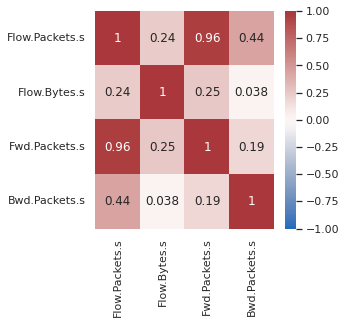

<Figure size 288x288 with 0 Axes>

In [22]:
df4 = data[['Flow.Packets.s', 'Flow.Bytes.s', 
'Fwd.Packets.s', 'Bwd.Packets.s']]

df = df4
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg4.png')

 


 
 



**Features Category(5): Information related to flow inter arrival time**



In [23]:
df5 = data[['Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min']]

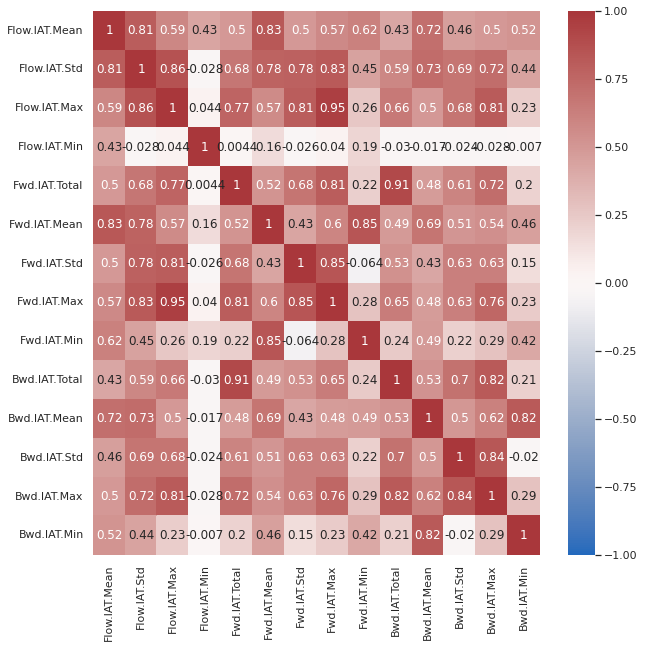

<Figure size 792x792 with 0 Axes>

In [29]:
df = df5
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(11,11)})
plt.show()
plt.savefig('heatmapcateg5.png')


In [25]:
df5.var()

Flow.IAT.Mean    1.260544e+13
Flow.IAT.Std     3.919961e+13
Flow.IAT.Max     4.311928e+14
Flow.IAT.Min     2.576899e+12
Fwd.IAT.Total    1.570190e+15
Fwd.IAT.Mean     6.986707e+13
Fwd.IAT.Std      5.462657e+13
Fwd.IAT.Max      4.199141e+14
Fwd.IAT.Min      5.298554e+13
Bwd.IAT.Total    1.491994e+15
Bwd.IAT.Mean     5.742776e+13
Bwd.IAT.Std      4.444423e+13
Bwd.IAT.Max      3.547650e+14
Bwd.IAT.Min      3.882638e+13
dtype: float64

**Features Category(6): Information related to packets’ flags**



In [30]:
df6 = data[['Fwd.PSH.Flags','Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags' ,'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
       'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count']]

Dropping all the columns due to the low-variance

In [31]:
df6.var()

Fwd.PSH.Flags     0.142443
Bwd.PSH.Flags     0.000000
Fwd.URG.Flags     0.000000
Bwd.URG.Flags     0.000000
FIN.Flag.Count    0.006988
SYN.Flag.Count    0.142443
RST.Flag.Count    0.000665
PSH.Flag.Count    0.241130
ACK.Flag.Count    0.240086
URG.Flag.Count    0.200442
CWE.Flag.Count    0.000000
ECE.Flag.Count    0.000656
dtype: float64

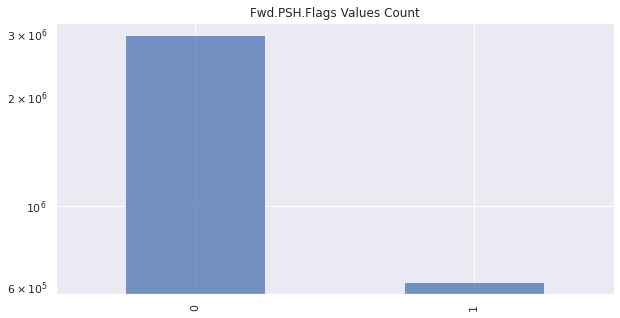

In [32]:
rcParams['figure.figsize'] = 10,5
data['Fwd.PSH.Flags'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title='Fwd.PSH.Flags Values Count')


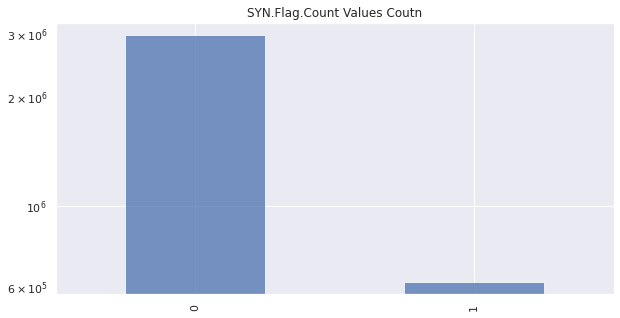

In [33]:
rcParams['figure.figsize'] = 10,5
data['SYN.Flag.Count'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'SYN.Flag.Count Values Coutn')

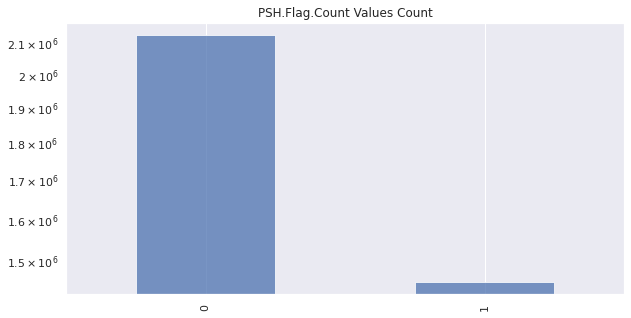

In [34]:
rcParams['figure.figsize'] = 10,5
data['PSH.Flag.Count'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'PSH.Flag.Count Values Count')


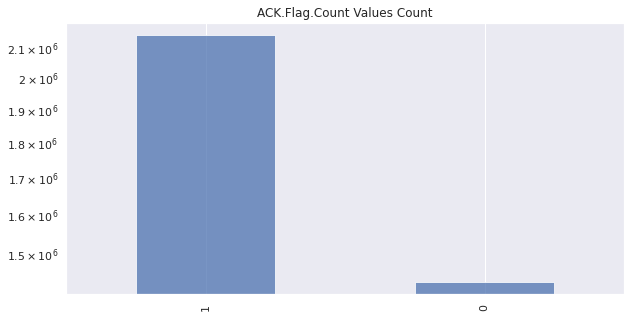

In [35]:
rcParams['figure.figsize'] = 10,5
data['ACK.Flag.Count'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'ACK.Flag.Count Values Count')

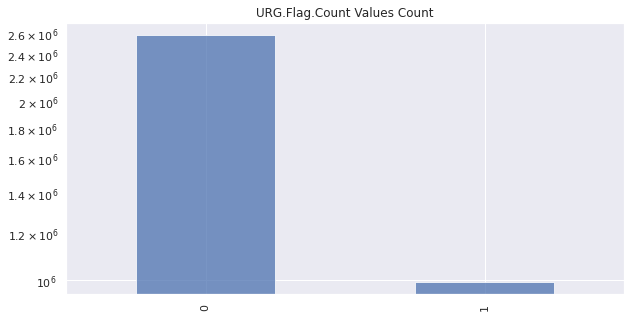

In [36]:
rcParams['figure.figsize'] = 10,5
data['URG.Flag.Count'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'URG.Flag.Count Values Count')

**Features Category(7): Packets-header information**



In [37]:
df7 = data[['Fwd.Header.Length','Bwd.Header.Length']]

In [38]:
df7.var()

Fwd.Header.Length    9.053416e+08
Bwd.Header.Length    9.236674e+08
dtype: float64

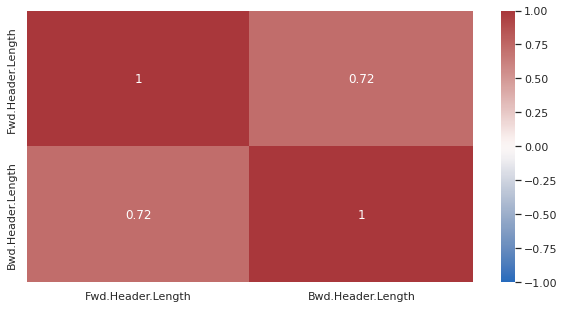

<Figure size 720x360 with 0 Axes>

In [39]:
df = df7
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg7.png')

**Features Category(8):  Information related to packets’ length per flow**



In [40]:
df8 = data [['Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance']]

In [41]:
df8.var()

Min.Packet.Length         1.718494e+03
Max.Packet.Length         6.019147e+06
Packet.Length.Mean        1.107177e+05
Packet.Length.Std         1.871499e+05
Packet.Length.Variance    5.268739e+11
dtype: float64

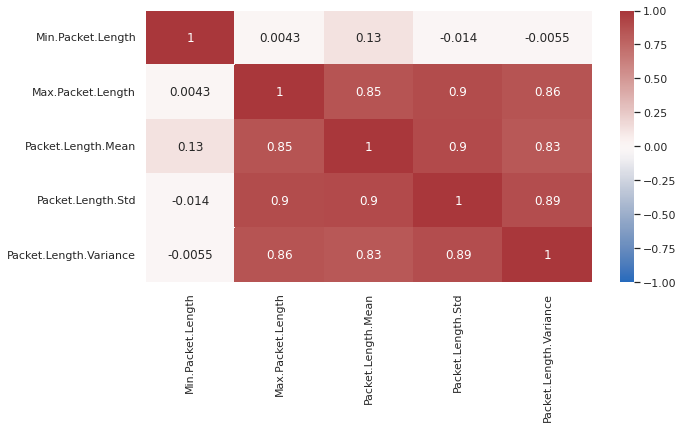

<Figure size 288x288 with 0 Axes>

In [43]:
df = df8
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(4,4)})
plt.show()
plt.savefig('heatmapcateg8.png')

**Features Category(9): Information related to the size of the packets**

In [44]:
df9 = data[['Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size','min_seg_size_forward']]

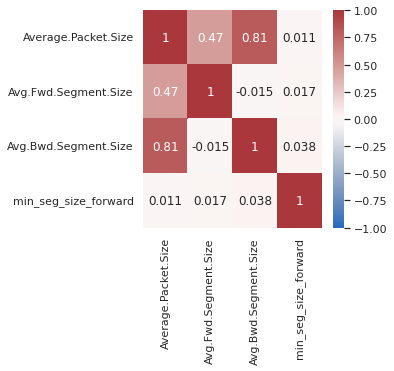

<Figure size 288x288 with 0 Axes>

In [45]:
df = df9
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg9.png')


In [46]:
df9.var()

Average.Packet.Size     117804.794461
Avg.Fwd.Segment.Size     60747.823823
Avg.Bwd.Segment.Size    256109.962267
min_seg_size_forward        36.312549
dtype: float64

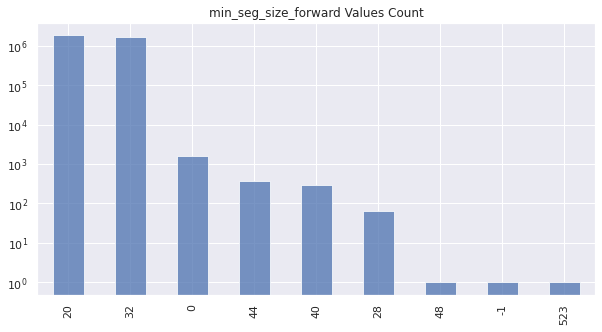

In [47]:
rcParams['figure.figsize'] = 10,5
data['min_seg_size_forward'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'min_seg_size_forward Values Count')

**Features Category(10): Information related to bulk rate**



In [48]:
df10 = data[['Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk',
       'Bwd.Avg.Bulk.Rate']]

In [49]:
df10.var()

Fwd.Avg.Bytes.Bulk      0.0
Fwd.Avg.Packets.Bulk    0.0
Fwd.Avg.Bulk.Rate       0.0
Bwd.Avg.Bytes.Bulk      0.0
Bwd.Avg.Packets.Bulk    0.0
Bwd.Avg.Bulk.Rate       0.0
dtype: float64

In [50]:
for (columnName, columnData) in df10.iteritems():
   print('Colunm Name : ', columnName)
   print(columnData.value_counts())
   print("++++++++++++++++++++")

Colunm Name :  Fwd.Avg.Bytes.Bulk
0    3577296
Name: Fwd.Avg.Bytes.Bulk, dtype: int64
++++++++++++++++++++
Colunm Name :  Fwd.Avg.Packets.Bulk
0    3577296
Name: Fwd.Avg.Packets.Bulk, dtype: int64
++++++++++++++++++++
Colunm Name :  Fwd.Avg.Bulk.Rate
0    3577296
Name: Fwd.Avg.Bulk.Rate, dtype: int64
++++++++++++++++++++
Colunm Name :  Bwd.Avg.Bytes.Bulk
0    3577296
Name: Bwd.Avg.Bytes.Bulk, dtype: int64
++++++++++++++++++++
Colunm Name :  Bwd.Avg.Packets.Bulk
0    3577296
Name: Bwd.Avg.Packets.Bulk, dtype: int64
++++++++++++++++++++
Colunm Name :  Bwd.Avg.Bulk.Rate
0    3577296
Name: Bwd.Avg.Bulk.Rate, dtype: int64
++++++++++++++++++++


**Features Category(11): Information related subflow**



In [51]:
df11 = data[['Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes',
       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes']]

In [52]:
df11.var()

Subflow.Fwd.Packets    1.197025e+06
Subflow.Fwd.Bytes      3.298566e+12
Subflow.Bwd.Packets    1.227869e+06
Subflow.Bwd.Bytes      4.512730e+12
dtype: float64

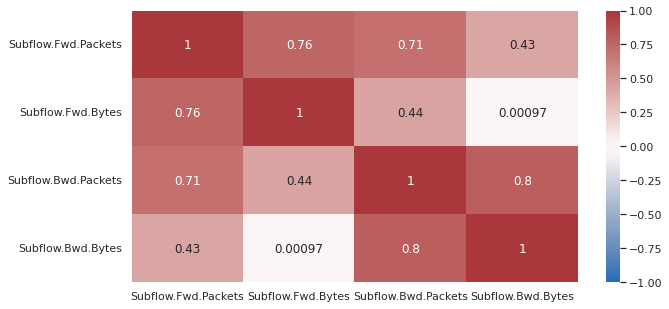

<Figure size 720x360 with 0 Axes>

In [53]:
df = df11
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg11.png')


**Features Category(12): Information related to the initial window size**

In [54]:
df12 = data[['Init_Win_bytes_forward',
       'Init_Win_bytes_backward']]

In [55]:
df12.var()

Init_Win_bytes_forward     1.988454e+08
Init_Win_bytes_backward    5.936377e+07
dtype: float64

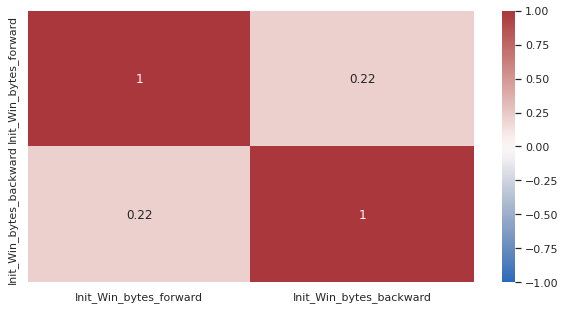

<Figure size 720x360 with 0 Axes>

In [56]:
df = df12
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg12.png')

**Features Category(13): Active / Idle time information**

In [57]:
df13 = data[['Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min']]

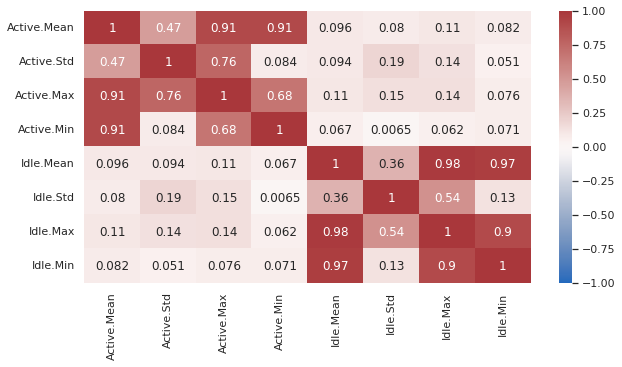

<Figure size 720x360 with 0 Axes>

In [58]:
df = df13
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg12.png')

**Features Category(14): No-Class**



In [59]:
data['Label'].value_counts()

BENIGN    3577296
Name: Label, dtype: int64

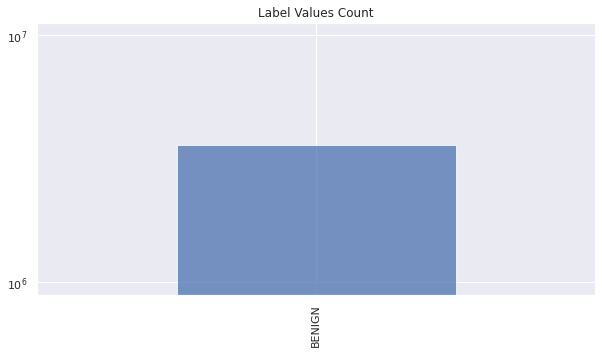

In [60]:
rcParams['figure.figsize'] = 10,5
data['Label'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, title = 'Label Values Count')

In [61]:
data['Down.Up.Ratio'].var()

1.6127601515547911

In [62]:
data[['ProtocolName', 'Down.Up.Ratio']].groupby('ProtocolName').mean()

,Down.Up.Ratio
ProtocolName,
99TAXI,0.000000
AMAZON,0.597698
APPLE,0.853447
APPLE_ICLOUD,0.556667
APPLE_ITUNES,0.749806
...,...
WHOIS_DAS,1.400000
WIKIPEDIA,1.294321
WINDOWS_UPDATE,1.199211


In [63]:
data['act_data_pkt_fwd'].value_counts()

0        935593
1        470976
2        388584
4        202051
3        183061
          ...  
18209         1
17100         1
6342          1
6634          1
37516         1
Name: act_data_pkt_fwd, Length: 7609, dtype: int64

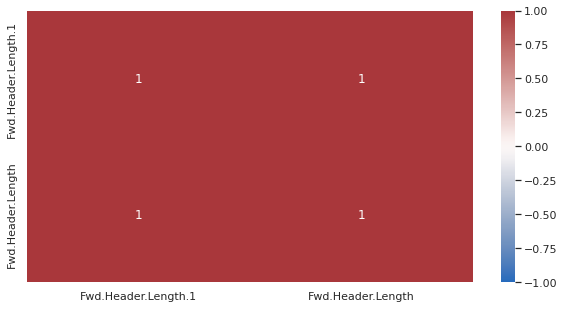

<Figure size 720x360 with 0 Axes>

In [64]:
df20=data[['Fwd.Header.Length.1','Fwd.Header.Length']]
df = df20
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmapcateg20.png')


In [65]:
df21= data[['Flow.ID','Source.IP','Source.Port','Destination.IP','Destination.Port', 'Protocol','Flow.Duration',
   'Total.Fwd.Packets','Total.Backward.Packets','Fwd.Packet.Length.Min','Fwd.Packet.Length.Mean','Bwd.Packet.Length.Min','Bwd.Packet.Length.Mean','Flow.Bytes.s'       
,'Fwd.Packets.s','Bwd.Packets.s','Flow.IAT.Mean','Flow.IAT.Std','Flow.IAT.Max','Flow.IAT.Min','Fwd.Header.Length', 'Min.Packet.Length','Packet.Length.Mean',
'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Subflow.Fwd.Packets','Subflow.Bwd.Packets','Init_Win_bytes_forward','Init_Win_bytes_backward',
'Active.Mean', 'Active.Std', 'Idle.Mean', 'Idle.Std', 'act_data_pkt_fwd', 'Down.Up.Ratio' , 'L7Protocol', 'ProtocolName']]

In [66]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 38 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Flow.ID                  object 
 1   Source.IP                object 
 2   Source.Port              int64  
 3   Destination.IP           object 
 4   Destination.Port         int64  
 5   Protocol                 int64  
 6   Flow.Duration            int64  
 7   Total.Fwd.Packets        int64  
 8   Total.Backward.Packets   int64  
 9   Fwd.Packet.Length.Min    int64  
 10  Fwd.Packet.Length.Mean   float64
 11  Bwd.Packet.Length.Min    int64  
 12  Bwd.Packet.Length.Mean   float64
 13  Flow.Bytes.s             float64
 14  Fwd.Packets.s            float64
 15  Bwd.Packets.s            float64
 16  Flow.IAT.Mean            float64
 17  Flow.IAT.Std             float64
 18  Flow.IAT.Max             float64
 19  Flow.IAT.Min             int64  
 20  Fwd.Header.Length        int64  
 21  Min.Pack

In [67]:
df21.shape

(3577296, 38)

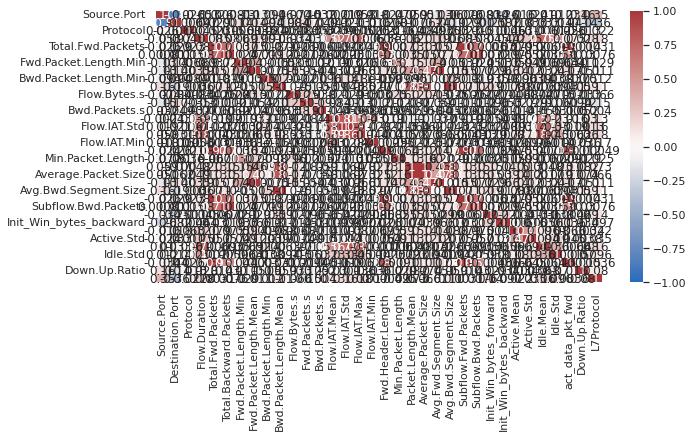

<Figure size 4320x4320 with 0 Axes>

In [68]:
df = df21
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()
plt.savefig('heatmapcateg5.png')


In [69]:
print(matrix)

                         Source.Port  Destination.Port  Protocol  \
Source.Port                 1.000000         -0.803906  0.026021   
Destination.Port           -0.803906          1.000000 -0.006353   
Protocol                    0.026021         -0.006353  1.000000   
Flow.Duration              -0.052972          0.097343  0.045323   
Total.Fwd.Packets          -0.025895          0.029131  0.022840   
Total.Backward.Packets      0.000807          0.001024  0.015327   
Fwd.Packet.Length.Min      -0.128127          0.137478  0.006767   
Fwd.Packet.Length.Mean     -0.129047          0.139804 -0.003451   
Bwd.Packet.Length.Min      -0.094178          0.094479  0.008371   
Bwd.Packet.Length.Mean      0.162291         -0.192587 -0.002986   
Flow.Bytes.s               -0.073501          0.083854 -0.000830   
Fwd.Packets.s              -0.147509          0.165330 -0.003483   
Bwd.Packets.s               0.031795         -0.048903 -0.003201   
Flow.IAT.Mean              -0.002137          0.

In [70]:
dataFinal = data[['Flow.ID','Source.IP','Source.Port','Destination.IP','Destination.Port', 'Protocol','Flow.Duration',
   'Total.Fwd.Packets','Total.Backward.Packets','Fwd.Packet.Length.Min','Fwd.Packet.Length.Mean','Bwd.Packet.Length.Min','Bwd.Packet.Length.Mean','Flow.Bytes.s'       
,'Flow.IAT.Min',
'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Init_Win_bytes_forward','Init_Win_bytes_backward',
'Active.Mean', 'Active.Std',  'Down.Up.Ratio' , 'L7Protocol', 'ProtocolName']]

In [71]:
dataFinal.shape

(3577296, 24)

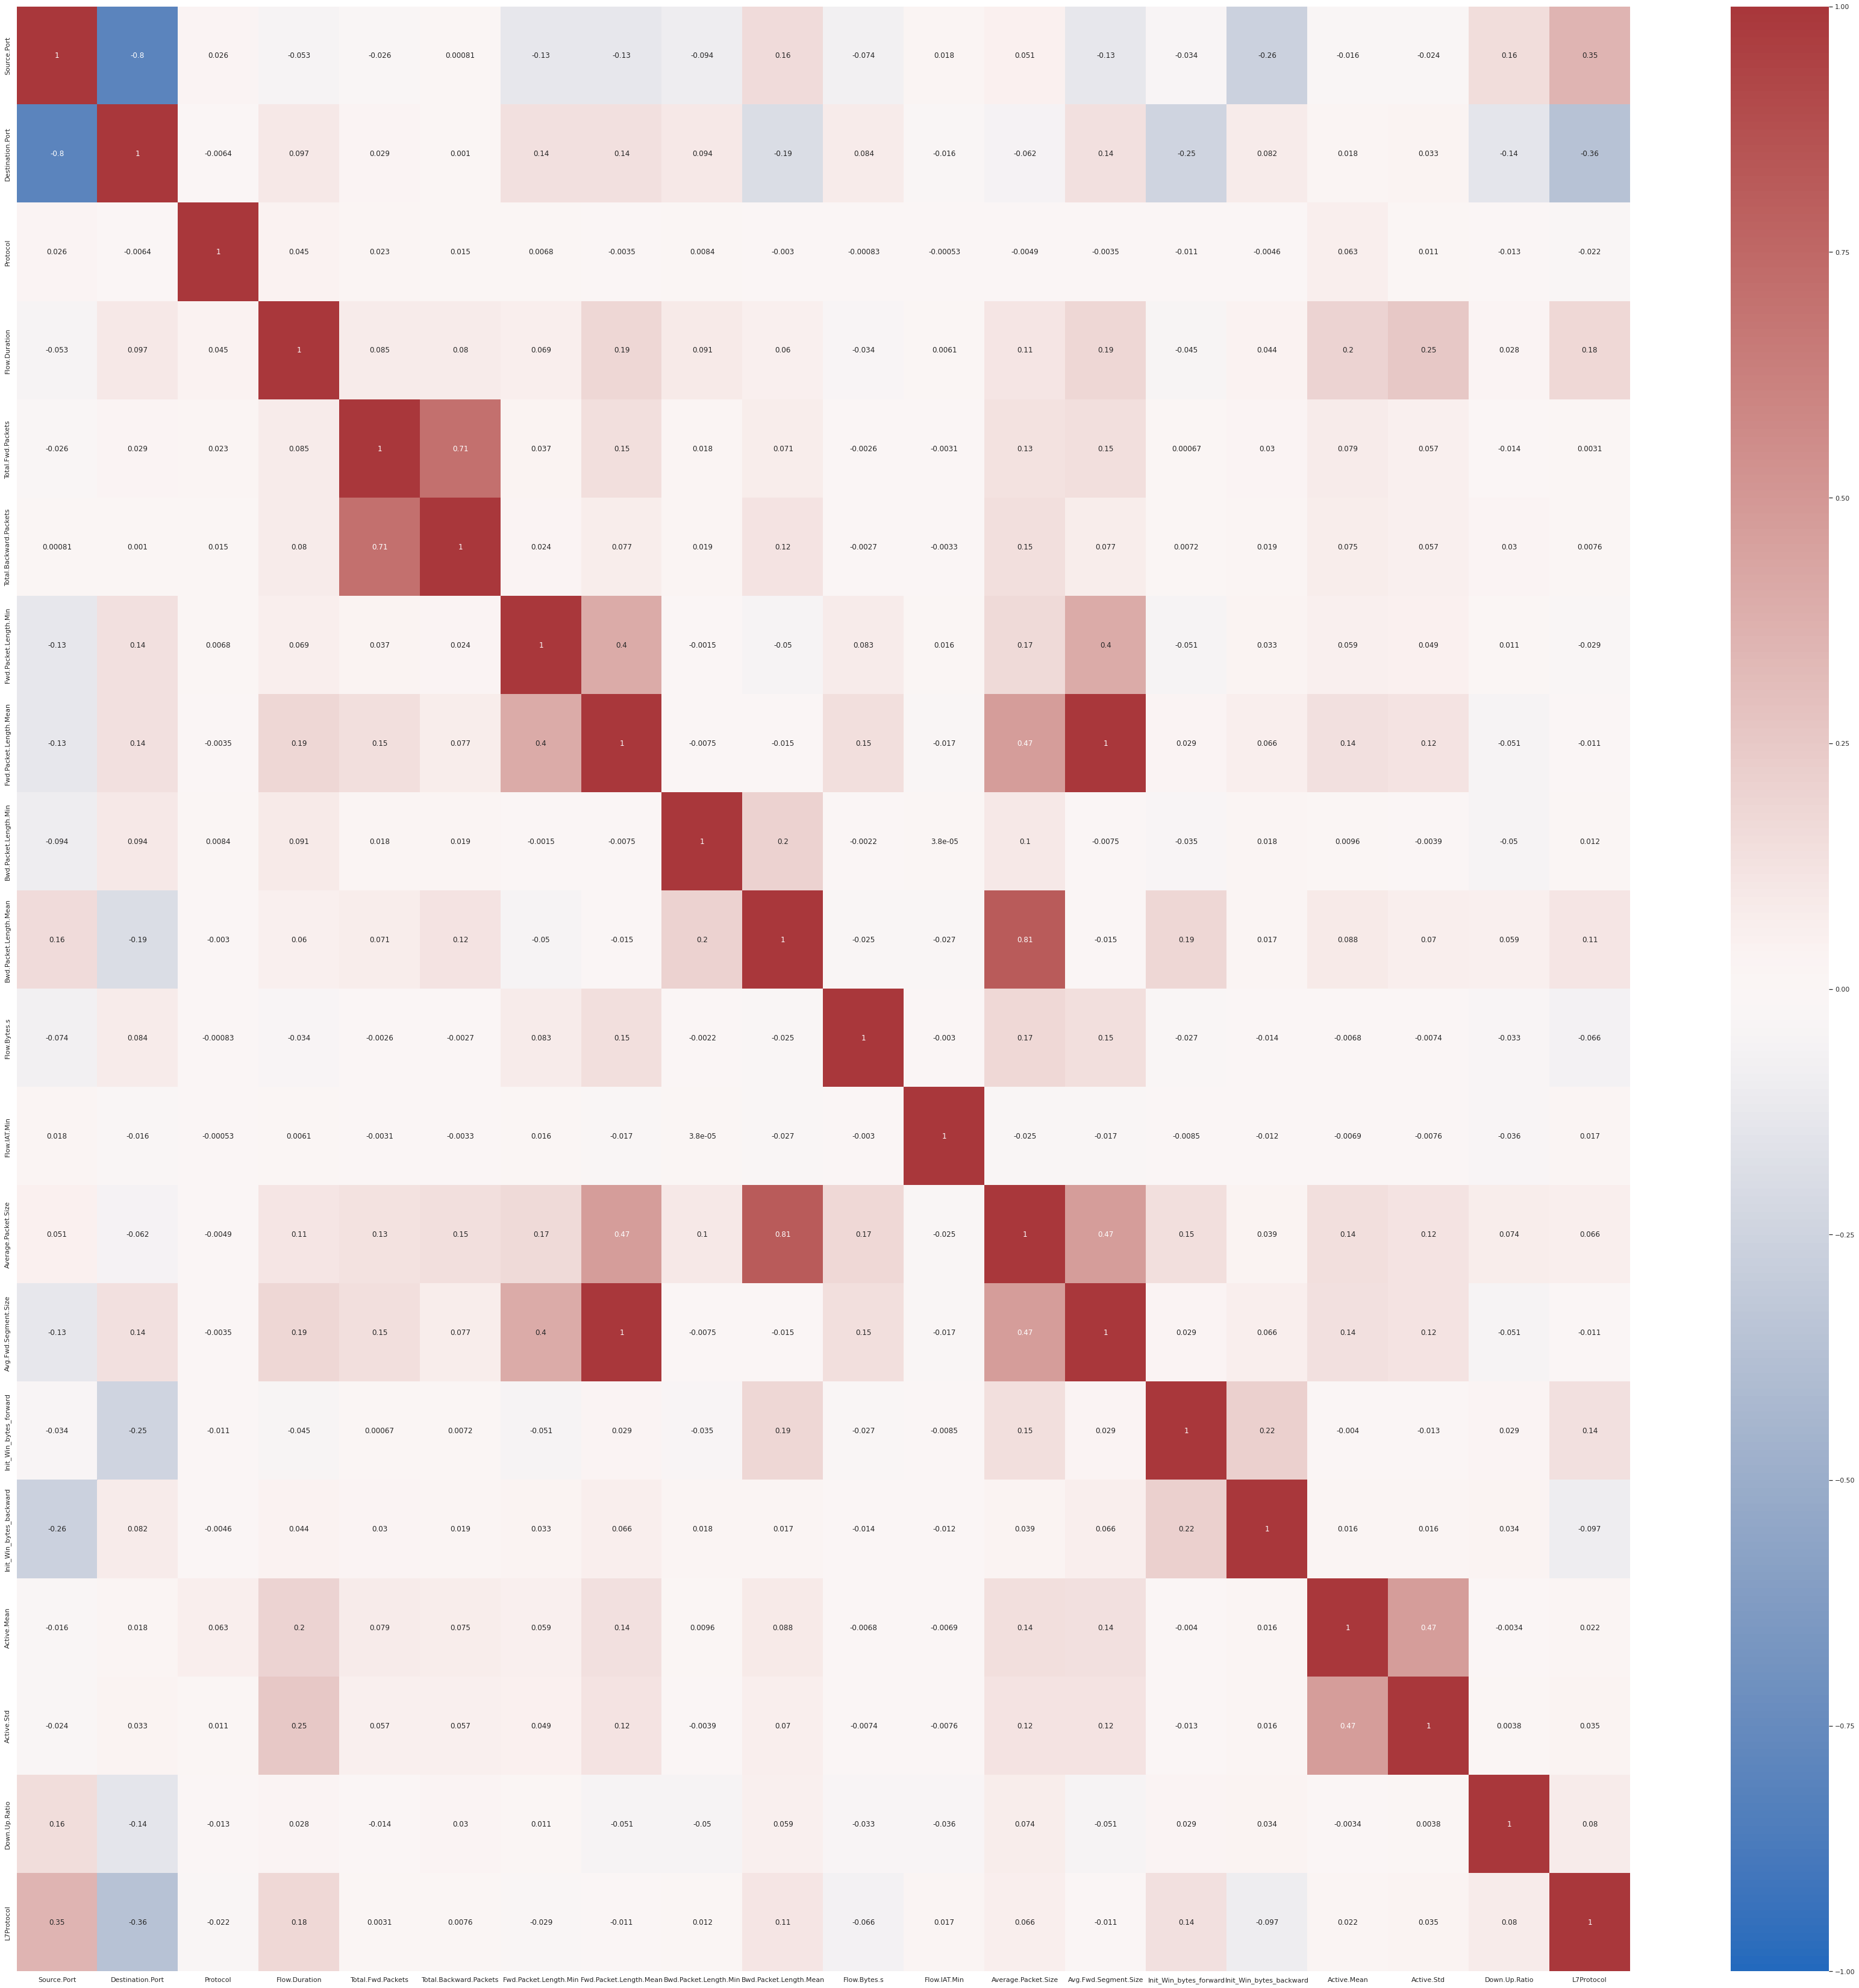

<Figure size 4320x4320 with 0 Axes>

In [72]:
df = dataFinal
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()
plt.savefig('heatmapcateg5.png')

In [67]:
"""dataFinal.to_csv (r'/content/drive/MyDrive/Operating-Systems-Project-Code/Dataset-OS-Final.csv', index = False) """
